# FeedbackCircuits Visualization Notebook for DM4 and DL5
This notebook provides a means to visualize a number of experiments using the DM4 and DL5 glomeruli built using the FeedbackCircuits library.

## Experiments with Two Interconnected Glomeruli

In [1]:
import h5py
import numpy as np
from IPython.display import clear_output
def get_sr(filename, show_results=False, start_time=2.):
    with h5py.File(filename, "r") as f:
        a_group_key = list(f.keys())[1]
        data = f[a_group_key]
        uids = list(data['uids'])
        indices = np.array(data['data']['index'])
        spikes = np.array(data['data']['time'])
    out_data = {}
    for uid in uids:
        if 'LN_3' in str(uid):
            # print(show_results)
            if show_results==True:
                print(str(uid))
                idx = uids.index(uid)
                idx_spikes = spikes[indices == idx]
                print(idx_spikes)
                general_spikes = idx_spikes[idx_spikes>2.]
                general_spikes = general_spikes[general_spikes<3.]
                print(general_spikes)
                sr = len(general_spikes)
                print(sr)
        idx = uids.index(uid)
        idx_spikes = spikes[indices == idx]
        general_spikes = idx_spikes[idx_spikes>start_time]
        general_spikes = general_spikes[general_spikes<3.]
        sr = len(general_spikes) / (3.-start_time)
        out_data[uid.decode("utf-8")] = sr
    return out_data

In [2]:
filenames = []
xs = []
ys = []
points = [0.,0.2,0.4,0.6,0.8,1.]
A = np.zeros((len(points),len(points)))
B = A * 0.
B2 = A * 0.
A2 = A * 0.
B3 = A * 0.
B4 = A * 0.
B8 = A * 0.
A3 = A * 0.
A4 = A * 0.
A5 = A * 0.
A6 = A * 0.
A7 = A * 0.
A8 = A * 0.
A9 = A * 0.
A10 = A * 0.
B9 = A * 0.
B10 = A * 0.
A11 = A * 0.
B11 = A * 0.
A12 = A * 0.
B12 = A * 0.
X = A * 0.
Y = A * 0.
for i in [0.,0.2,0.4,0.6,0.8,1.]:
    for j in [0.,0.2,0.4,0.6,0.8,1.]:
        filenames.append("../sim_results2/fo2_DM4DL5_3_full_conc_10.0_my_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1], show_results = (i>0.9) & (j>0.9))
        A[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        B[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DM4DL5_3_ln1_conc_10.0_my_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A2[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        B2[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DM4DL5_3_ln2_conc_10.0_my_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A3[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        B3[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DM4DL5_3_ln12_conc_10.0_my_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1], show_results = (i>0.9) & (j>0.9))
        A4[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        B4[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        X[points.index(i),points.index(j)] = i * 10. * 0.3 / 2.94
        Y[points.index(i),points.index(j)] = j * 10. * 0.3 / 2.94

clear_output()

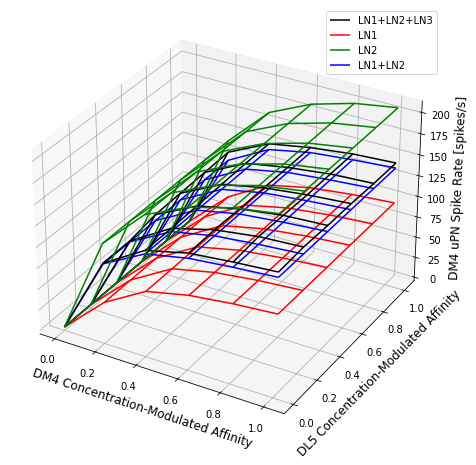

In [3]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot_wireframe(X, Y, A, color='black')
ax.plot_wireframe(X, Y, A2, color='red')
ax.plot_wireframe(X, Y, A3, color='green')
ax.plot_wireframe(X, Y, A4, color='blue')
ax.set_xlabel('DM4 Concentration-Modulated Affinity')
ax.set_ylabel('DL5 Concentration-Modulated Affinity')
ax.set_zlabel('DM4 uPN Spike Rate [spikes/s]')
plt.legend(['LN1+LN2+LN3','LN1','LN2','LN1+LN2'])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.zaxis.label]):
    item.set_fontsize(12)
    
plt.savefig('DM4_2glom.pdf')

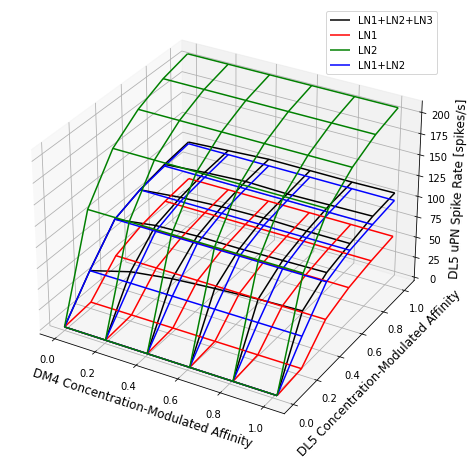

In [4]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot_wireframe(X, Y, B, color='black')
ax.plot_wireframe(X, Y, B2, color='red')
ax.plot_wireframe(X, Y, B3, color='green')
ax.plot_wireframe(X, Y, B4, color='blue')
ax.set_xlabel('DM4 Concentration-Modulated Affinity')
ax.set_ylabel('DL5 Concentration-Modulated Affinity')
ax.set_zlabel('DL5 uPN Spike Rate [spikes/s]')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.zaxis.label]):
    item.set_fontsize(12)
    
plt.legend(['LN1+LN2+LN3','LN1','LN2','LN1+LN2'])
plt.savefig('DL5_2glom.pdf')

In [5]:
filenames = []
xs = []
ys = []
points = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
A = np.zeros((len(points),len(points)))
B = A * 0.
B2 = A * 0.
A2 = A * 0.
B3 = A * 0.
B8 = A * 0.
A3 = A * 0.
A4 = A * 0.
A5 = A * 0.
A6 = A * 0.
A7 = A * 0.
A8 = A * 0.
A9 = A * 0.
A10 = A * 0.
B9 = A * 0.
B10 = A * 0.
A11 = A * 0.
B11 = A * 0.
A12 = A * 0.
B12 = A * 0.
X = A * 0.
Y = A * 0.
for i in [0.]:
    for j in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
        filenames.append("../sim_results2/fo2_DL5_3_all_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        print('LN3:', DX['LN_3'])
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        B[points.index(i),points.index(j)] = DX['LN_1']
        B3[points.index(i),points.index(j)] = DX['LN_3']
        filenames.append("../sim_results2/fo2_DL5_3_ln12_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A2[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        B2[points.index(i),points.index(j)] = DX['LN_1']
        print('No LN3:')
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        filenames.append("../sim_results2/fo2_DL5_3_ln1_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A3[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DL5_3_ln2_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1], start_time=2.75) # steady-state is reached late, so we use a later start time
        A4[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DL5_3_lnless_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1], start_time=2.75)
        A5[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        
        X[points.index(i),points.index(j)] = i * 10. * 0.3 / 2.94
        Y[points.index(i),points.index(j)] = j * 10. * 0.3 / 2.94
        print('Xval:', X[points.index(i),points.index(j)])


clear_output()

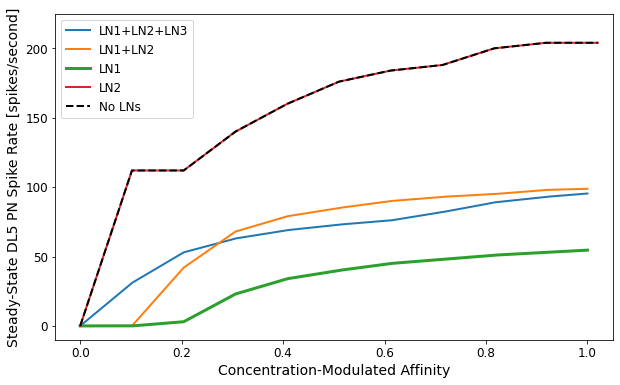

In [6]:
from scipy.interpolate import interp1d

plt.figure(figsize=(10,6))

import matplotlib.pyplot as plt
import numpy as np

colors = iter([plt.cm.tab10(i) for i in range(10)])

x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.

def get_smooth_curve(x):
    f = interp1d(Y[0,:], x, kind='linear')
    x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.
    return np.maximum(0.,f(x))

plt.plot(x,get_smooth_curve(A[0,:]), linewidth=2, c=next(colors))
plt.plot(x,get_smooth_curve(A2[0,:]), linewidth=2, c=next(colors))
plt.plot(x, get_smooth_curve(A3[0,:]), linewidth=3, c=next(colors))
plt.plot(Y[0,:], np.minimum(280.,A4[0,:]), linewidth=2, c=next(colors))
plt.plot(Y[0,:], np.minimum(280.,A5[0,:]),'--k', linewidth=2)
legend_data = ['LN1+LN2+LN3', 'LN1+LN2', 'LN1', 'LN2', 'No LNs']
plt.legend(legend_data, prop={'size': 12})
plt.xlabel('Concentration-Modulated Affinity')
plt.ylabel('Steady-State DL5 PN Spike Rate [spikes/second]')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)
plt.tick_params(labelsize=12)
plt.axis([-0.05,1.05,-10,225])
plt.savefig('DL5_short.pdf')

## Inhibitory DL5

In [7]:
filenames = []
xs = []
ys = []
points = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
A = np.zeros((len(points),len(points)))
B = A * 0.
B2 = A * 0.
A2 = A * 0.
B3 = A * 0.
B8 = A * 0.
A3 = A * 0.
A4 = A * 0.
A5 = A * 0.
A6 = A * 0.
A7 = A * 0.
A8 = A * 0.
A9 = A * 0.
A10 = A * 0.
B9 = A * 0.
B10 = A * 0.
A11 = A * 0.
B11 = A * 0.
A12 = A * 0.
B12 = A * 0.
X = A * 0.
Y = A * 0.
for i in [0.]:
    for j in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
        filenames.append("../sim_results2/fo2_DL5_3i_all_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        print('LN3:', DX['LN_3'])
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        B[points.index(i),points.index(j)] = DX['LN_1']
        B3[points.index(i),points.index(j)] = DX['LN_3']
        filenames.append("../sim_results2/fo2_DL5_3i_ln12_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A2[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        B2[points.index(i),points.index(j)] = DX['LN_1']
        print('No LN3:')
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        filenames.append("../sim_results2/fo2_DL5_3i_ln1_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A3[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DL5_3i_ln2_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1], start_time=2.75) # steady-state is reached late, so we use a later start time
        A4[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DL5_3i_lnless_conc_10.0_my_DL5_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1], start_time=2.75)
        A5[points.index(i),points.index(j)] = DX['DL5_adPN_R_1_PN']
        
        X[points.index(i),points.index(j)] = i * 10. * 0.3 / 2.94
        Y[points.index(i),points.index(j)] = j * 10. * 0.3 / 2.94
        print('Xval:', X[points.index(i),points.index(j)])


clear_output()

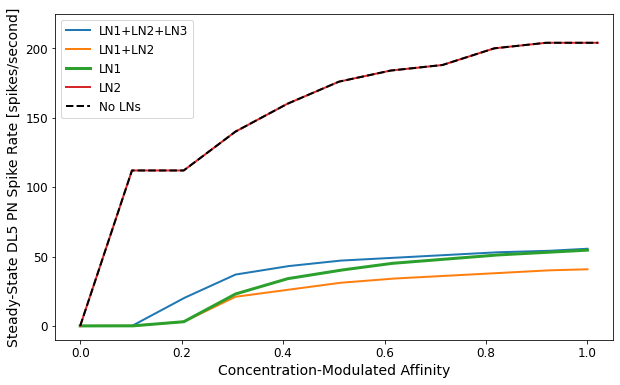

In [8]:
from scipy.interpolate import interp1d

plt.figure(figsize=(10,6))

import matplotlib.pyplot as plt
import numpy as np

colors = iter([plt.cm.tab10(i) for i in range(10)])

x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.

def get_smooth_curve(x):
    f = interp1d(Y[0,:], x, kind='linear')
    x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.
    return np.maximum(0.,f(x))

plt.plot(x,get_smooth_curve(A[0,:]), linewidth=2, c=next(colors))
plt.plot(x,get_smooth_curve(A2[0,:]), linewidth=2, c=next(colors))
plt.plot(x, get_smooth_curve(A3[0,:]), linewidth=3, c=next(colors))
plt.plot(Y[0,:], np.minimum(280.,A4[0,:]), linewidth=2, c=next(colors))
plt.plot(Y[0,:], np.minimum(280.,A5[0,:]),'--k', linewidth=2)
legend_data = ['LN1+LN2+LN3', 'LN1+LN2', 'LN1', 'LN2', 'No LNs']
plt.legend(legend_data, prop={'size': 12})
plt.xlabel('Concentration-Modulated Affinity')
plt.ylabel('Steady-State DL5 PN Spike Rate [spikes/second]')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)
plt.tick_params(labelsize=12)
plt.axis([-0.05,1.05,-10,225])
plt.savefig('DL5i_short.pdf')

## DM4

In [9]:
filenames = []
xs = []
ys = []
points = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
A = np.zeros((len(points),len(points)))
B = A * 0.
B2 = A * 0.
A2 = A * 0.
B3 = A * 0.
B8 = A * 0.
A3 = A * 0.
A4 = A * 0.
A5 = A * 0.
A6 = A * 0.
A7 = A * 0.
A8 = A * 0.
A9 = A * 0.
A10 = A * 0.
B9 = A * 0.
B10 = A * 0.
A11 = A * 0.
B11 = A * 0.
A12 = A * 0.
B12 = A * 0.
X = A * 0.
Y = A * 0.
for i in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    for j in [0.]:
        filenames.append("../sim_results2/fo2_DM4_3_all_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        print('LN3:', DX['LN_3'])
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        B[points.index(i),points.index(j)] = DX['LN_1']
        B3[points.index(i),points.index(j)] = DX['LN_3']
        filenames.append("../sim_results2/fo2_DM4_3_ln12_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A2[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        B2[points.index(i),points.index(j)] = DX['LN_1']
        print('No LN3:')
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        filenames.append("../sim_results2/fo2_DM4_3_ln1_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A3[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DM4_3_ln2_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A4[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DM4_3_lnless_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A5[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        
        X[points.index(i),points.index(j)] = i * 10. * 0.3 / 2.94
        Y[points.index(i),points.index(j)] = j * 10. * 0.3 / 2.94
        print('Xval:', X[points.index(i),points.index(j)])
clear_output()

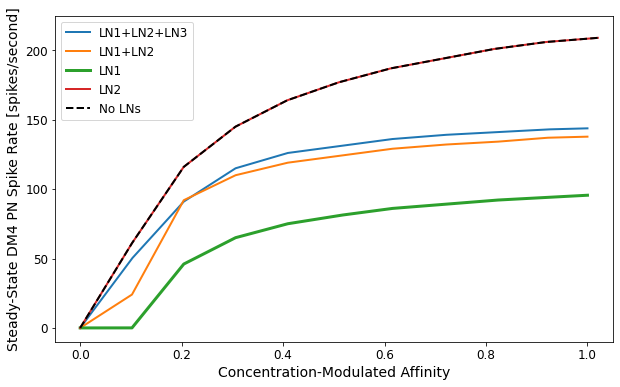

In [10]:
from scipy.interpolate import interp1d

plt.figure(figsize=(10,6))

import matplotlib.pyplot as plt
import numpy as np

colors = iter([plt.cm.tab10(i) for i in range(10)])

x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.

def get_smooth_curve(x):
    f = interp1d(X[:,0], x, kind='linear')
    x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.
    return np.maximum(0.,f(x))

plt.plot(x,get_smooth_curve(A[:,0]), linewidth=2, c=next(colors))
plt.plot(x,get_smooth_curve(A2[:,0]), linewidth=2, c=next(colors))
plt.plot(x, get_smooth_curve(A3[:,0]), linewidth=3, c=next(colors))
plt.plot(X[:,0], np.minimum(280.,A4[:,0]), linewidth=2, c=next(colors))
plt.plot(X[:,0], np.minimum(280.,A5[:,0]),'--k', linewidth=2)
legend_data = ['LN1+LN2+LN3', 'LN1+LN2', 'LN1', 'LN2', 'No LNs']
plt.legend(legend_data, prop={'size': 12})
plt.xlabel('Concentration-Modulated Affinity')
plt.ylabel('Steady-State DM4 PN Spike Rate [spikes/second]')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)
plt.tick_params(labelsize=12)
plt.axis([-0.05,1.05,-10,225])
plt.savefig('DM4_short.pdf')

## Inhibitory DM4

In [11]:
filenames = []
xs = []
ys = []
points = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
A = np.zeros((len(points),len(points)))
B = A * 0.
B2 = A * 0.
A2 = A * 0.
B3 = A * 0.
B8 = A * 0.
A3 = A * 0.
A4 = A * 0.
A5 = A * 0.
A6 = A * 0.
A7 = A * 0.
A8 = A * 0.
A9 = A * 0.
A10 = A * 0.
B9 = A * 0.
B10 = A * 0.
A11 = A * 0.
B11 = A * 0.
A12 = A * 0.
B12 = A * 0.
X = A * 0.
Y = A * 0.
for i in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    for j in [0.]:
        filenames.append("../sim_results2/fo2_DM4_3i_all_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        print('LN3:', DX['LN_3'])
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        B[points.index(i),points.index(j)] = DX['LN_1']
        B3[points.index(i),points.index(j)] = DX['LN_3']
        filenames.append("../sim_results2/fo2_DM4_3i_ln12_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A2[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        B2[points.index(i),points.index(j)] = DX['LN_1']
        print('No LN3:')
        print('LN1:', DX['LN_1'])
        print('LN2:', DX['LN_2'])
        filenames.append("../sim_results2/fo2_DM4_3i_ln1_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A3[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DM4_3i_ln2_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A4[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        filenames.append("../sim_results2/fo2_DM4_3i_lnless_conc_10.0_my_DM4_experiment_"+str(i)+ "_" + str(j))
        DX = get_sr(filenames[-1])
        A5[points.index(i),points.index(j)] = DX['DM4_adPN_R_1_PN']
        
        X[points.index(i),points.index(j)] = i * 10. * 0.3 / 2.94
        Y[points.index(i),points.index(j)] = j * 10. * 0.3 / 2.94
        print('Xval:', X[points.index(i),points.index(j)])
clear_output()

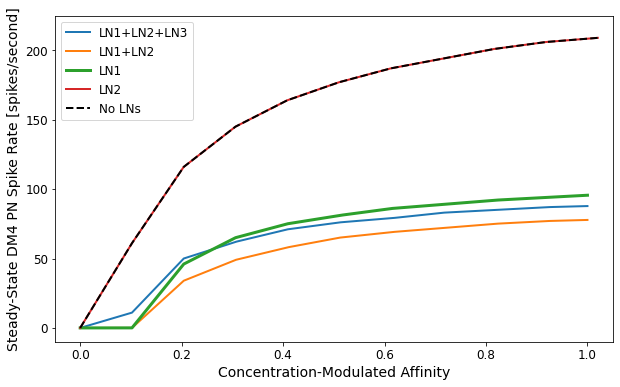

In [12]:
from scipy.interpolate import interp1d

plt.figure(figsize=(10,6))

import matplotlib.pyplot as plt
import numpy as np

colors = iter([plt.cm.tab10(i) for i in range(10)])

x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.

def get_smooth_curve(x):
    f = interp1d(X[:,0], x, kind='linear')
    x = np.linspace(0, 1000, num=1000, endpoint=True)/1000.
    return np.maximum(0.,f(x))

plt.plot(x,get_smooth_curve(A[:,0]), linewidth=2, c=next(colors))
plt.plot(x,get_smooth_curve(A2[:,0]), linewidth=2, c=next(colors))
plt.plot(x, get_smooth_curve(A3[:,0]), linewidth=3, c=next(colors))
plt.plot(X[:,0], np.minimum(280.,A4[:,0]), linewidth=2, c=next(colors))
plt.plot(X[:,0], np.minimum(280.,A5[:,0]),'--k', linewidth=2)
legend_data = ['LN1+LN2+LN3', 'LN1+LN2', 'LN1', 'LN2', 'No LNs']
plt.legend(legend_data, prop={'size': 12})
plt.xlabel('Concentration-Modulated Affinity')
plt.ylabel('Steady-State DM4 PN Spike Rate [spikes/second]')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)
plt.tick_params(labelsize=12)
plt.axis([-0.05,1.05,-10,225])
plt.savefig('DM4i_short.pdf')